# Initial Data Exploration

## The Residential Property Price Register (RPPR) Dataset

In [1]:
# Import various libraries & packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

In [2]:
# Read CSV file into a Data Frame:
df = pd.read_csv('data/raw/rppr_ireland.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [3]:
# Checking how many rows and columns:
df.shape

(10000, 9)

In [4]:
# Print first 5 rows:
df.head(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,12/1/2016,"NEAMH COTTAGE CARRIGDANGAN, KILMICHAEL, CORK",NaN,Cork,"€30,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,9/9/2010,"No.5 O'Brien Street, Waterford",NaN,Waterford,"€7,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,14/03/2018,"CLOGHERANE, LAURAGH, KILLARNEY",NaN,Kerry,"€170,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,30/05/2014,"27 The Oaks, Frenchpark",NaN,Roscommon,"€30,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
4,26/11/2010,"71 Laurel Grove, Tagoat, Wexford",NaN,Wexford,"€95,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [5]:
# Print last 5 rows:
df.tail(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
9995,17/04/2014,"1 THE GARDENS, CLOGHERHEAD, LOUTH",NaN,Louth,"€130,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9996,1/8/2019,"25 ASSUMPTION RD, ATHLONE, CO WESTMEATH",NaN,Westmeath,"€138,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9997,13/12/2021,"5 CAIRNCOURT, DUNTAHEEN ROAD, FERMOY",NaN,Cork,"€337,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9998,5/10/2015,"117 Ard Ban, Muff",NaN,Donegal,"€162,995.60",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
9999,5/4/2013,"76 Hampton Green, Balbriggan",NaN,Dublin,"€118,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [6]:
# Check Feature Data Types:
df.dtypes

Date of Sale (dd/mm/yyyy)    object
Address                      object
Postal Code                  object
County                       object
Price (€)                    object
Not Full Market Price        object
VAT Exclusive                object
Description of Property      object
Property Size Description    object
dtype: object

In [7]:
# Check the Information of the Columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date of Sale (dd/mm/yyyy)  10000 non-null  object
 1   Address                    10000 non-null  object
 2   Postal Code                1914 non-null   object
 3   County                     10000 non-null  object
 4   Price (€)                  10000 non-null  object
 5   Not Full Market Price      10000 non-null  object
 6   VAT Exclusive              10000 non-null  object
 7   Description of Property    10000 non-null  object
 8   Property Size Description  1016 non-null   object
dtypes: object(9)
memory usage: 703.2+ KB


Two significant observations from column information are that ‘Postal Code’ and ‘Property Size Description’ has a great deal of null values.

In [8]:
# Check out the Columns Names:
df.columns

Index(['Date of Sale (dd/mm/yyyy)', 'Address', 'Postal Code', 'County',
       'Price (€)', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

<b>Columns Names:</b><br>
After seeing the column names I have some changes I wish to make to aid in future analysis/working with the data.<br>
First off, I am going to rid the price column of the euro symbol and update the column name to ‘Price_euro’.<br>
Also, I am going to rid the date column of the parathesis’s and update the column name to ‘Date_of_Sale_ddmmyyyy’.<br>
Finally, I will replace all spaces in column names with underscores.<br>
Again, these changes make it significantly easier to work with the data.<br>

In [9]:
# Replacing the euro symbol from Price Column:
df.rename(columns={'Price (€)': 'Price_euro'}, inplace=True)
# Rename Date of Sale Column:
df.rename(columns={'Date of Sale (dd/mm/yyyy)': 'Date_of_Sale_ddmmyyyy'}, inplace=True)

In [11]:
# Replacing Column spaces for Underscores:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Date_of_Sale_ddmmyyyy', 'Address', 'Postal_Code', 'County',
       'Price_euro', 'Not_Full_Market_Price', 'VAT_Exclusive',
       'Description_of_Property', 'Property_Size_Description'],
      dtype='object')

<b>Price Column (Euro & Comma Symbol):</b><br>
While inspecting the ‘Price_euro’ column I notice that the euro symbol and comma needs to be excluded before changing data types or any statistical analysis can be made on that column.<br>
Below, I rid the price column of the two symbols:


In [12]:
# Removing the euro symbol from the values of the Price Column:
df.Price_euro = df.Price_euro.str.replace('€', '')
df.head(5)

,Date_of_Sale_ddmmyyyy,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description
0,12/1/2016,"NEAMH COTTAGE CARRIGDANGAN, KILMICHAEL, CORK",NaN,Cork,"30,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,9/9/2010,"No.5 O'Brien Street, Waterford",NaN,Waterford,"7,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,14/03/2018,"CLOGHERANE, LAURAGH, KILLARNEY",NaN,Kerry,"170,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,30/05/2014,"27 The Oaks, Frenchpark",NaN,Roscommon,"30,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
4,26/11/2010,"71 Laurel Grove, Tagoat, Wexford",NaN,Wexford,"95,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [13]:
# Remove commas from Price_euro Column:
df.Price_euro = df.Price_euro.str.replace(',', '')
df.head(5)

,Date_of_Sale_ddmmyyyy,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description
0,12/1/2016,"NEAMH COTTAGE CARRIGDANGAN, KILMICHAEL, CORK",NaN,Cork,30000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
1,9/9/2010,"No.5 O'Brien Street, Waterford",NaN,Waterford,7000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
2,14/03/2018,"CLOGHERANE, LAURAGH, KILLARNEY",NaN,Kerry,170000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
3,30/05/2014,"27 The Oaks, Frenchpark",NaN,Roscommon,30000.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
4,26/11/2010,"71 Laurel Grove, Tagoat, Wexford",NaN,Wexford,95000.00,No,No,Second-Hand Dwelling house /Apartment,NaN


<b>Data of Sale Column:</b><br>
To aid in future analysis, I am going to add a ‘Day’, ‘Month’, and ‘Year’ columns and populating those fields with the information from the current ‘Date_of_Sale_ddmmyyyy’ column.<br>
The two main reasons for these changes:<br>
1)	Ease of using the date with these distinctions<br>
2)	It will add levels of the date to more easily analysis (i.e., by month, day, or year only)

In [14]:
# Split Date of Sale into Year, Month, Day Columns:
df[['Day', 'Month', 'Year']] = df.Date_of_Sale_ddmmyyyy.str.split('/', expand=True)
df.head(5)

,Date_of_Sale_ddmmyyyy,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year
0,12/1/2016,"NEAMH COTTAGE CARRIGDANGAN, KILMICHAEL, CORK",NaN,Cork,30000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,12,1,2016
1,9/9/2010,"No.5 O'Brien Street, Waterford",NaN,Waterford,7000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,9,9,2010
2,14/03/2018,"CLOGHERANE, LAURAGH, KILLARNEY",NaN,Kerry,170000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,14,03,2018
3,30/05/2014,"27 The Oaks, Frenchpark",NaN,Roscommon,30000.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,30,05,2014
4,26/11/2010,"71 Laurel Grove, Tagoat, Wexford",NaN,Wexford,95000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,26,11,2010


While inspecting the new date columns, I notice that some fields have a leading zero, which should be taken care of.  Below when I am going to update the data types, the leading zeros will be solved.  I will change the new date columns into ‘int’, which disregards leading zeros.

In [15]:
df['DoS_yyyymmdd'] = df.Year + '/' + df.Month + '/' + df.Day
df.head(5)

,Date_of_Sale_ddmmyyyy,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year,DoS_yyyymmdd
0,12/1/2016,"NEAMH COTTAGE CARRIGDANGAN, KILMICHAEL, CORK",NaN,Cork,30000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,12,1,2016,2016/1/12
1,9/9/2010,"No.5 O'Brien Street, Waterford",NaN,Waterford,7000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,9,9,2010,2010/9/9
2,14/03/2018,"CLOGHERANE, LAURAGH, KILLARNEY",NaN,Kerry,170000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,14,03,2018,2018/03/14
3,30/05/2014,"27 The Oaks, Frenchpark",NaN,Roscommon,30000.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,30,05,2014,2014/05/30
4,26/11/2010,"71 Laurel Grove, Tagoat, Wexford",NaN,Wexford,95000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,26,11,2010,2010/11/26


<b>Updating Data Types:</b><br>
Initially, I was going to update this data type to datetime, but this format is not in datetime’s default format.  I have already made a new column ‘DoS_yyyymmdd’, which is in the format of datetime, so I will drop this column below.<br>
<b>Address:</b> string<br>
Decided on string for use in future processes.<br>
<b>Postal_Code:</b> category<br>
<b>County:</b> category<br>
<b>Price_euro:</b>  float64<br>
<b>Not_Full_Market_Price:</b>  category<br>
<b>VAT_Exclusive:</b> category<br>
<b>Description_of_Property:</b> category<br>
After looking at the data, there was only two description types, so categorical made the most sense.<br>
<b>Property_Size_Description:</b> category<br>
After looking at the data, these fell into standard descriptions, so categorical made the most sense.<br>
<b>Day:</b> category<br>
Initially, will update data type to int.  This will rid them of leading zeros but will then update to category as they are broken down into more specific bins.<br>
<b>Month:</b> category<br>
Initially, will update data type to int.  This will rid them of leading zeros but will then update to category as they are broken down into more specific bins.<br>
<b>Year:</b> category<br>
Initially, will update data type to int.  This will rid them of leading zeros but will then update to category as they are broken down into more specific bins.<br>
<b>DoS_yyyymmdd:</b> datetime<br>
I know datetime uses nanoseconds, but it made the most sense to have date as a date type.  I did not make this categorical due to the data spanning ten years.<br>


In [16]:
df.dtypes

Date_of_Sale_ddmmyyyy        object
Address                      object
Postal_Code                  object
County                       object
Price_euro                   object
Not_Full_Market_Price        object
VAT_Exclusive                object
Description_of_Property      object
Property_Size_Description    object
Day                          object
Month                        object
Year                         object
DoS_yyyymmdd                 object
dtype: object

In [17]:
# Change Data Types:
df['DoS_yyyymmdd'] = df['DoS_yyyymmdd'].astype('datetime64')

df['Address'] = df['Address'].astype('string')

df['Postal_Code'] = df['Postal_Code'].astype('category')
df['County'] = df['County'].astype('category')
df['Not_Full_Market_Price'] = df['Not_Full_Market_Price'].astype('category')
df['VAT_Exclusive'] = df['VAT_Exclusive'].astype('category')
df['Description_of_Property'] = df['Description_of_Property'].astype('category')
df['Property_Size_Description'] = df['Property_Size_Description'].astype('category')

df['Price_euro'] = df['Price_euro'].astype('float64')

df['Day'] = df['Day'].astype('int64')
df['Month'] = df['Month'].astype('int64')
df['Year'] = df['Year'].astype('int64')

df.dtypes

Date_of_Sale_ddmmyyyy                object
Address                              string
Postal_Code                        category
County                             category
Price_euro                          float64
Not_Full_Market_Price              category
VAT_Exclusive                      category
Description_of_Property            category
Property_Size_Description          category
Day                                   int64
Month                                 int64
Year                                  int64
DoS_yyyymmdd                 datetime64[ns]
dtype: object

In [18]:
# Change Day, Month, and Year to Category:
# Intially changed to int64 to rid of leading zeros:
df['Day'] = df['Day'].astype('category')
df['Month'] = df['Month'].astype('category')
df['Year'] = df['Year'].astype('category')

df.dtypes

Date_of_Sale_ddmmyyyy                object
Address                              string
Postal_Code                        category
County                             category
Price_euro                          float64
Not_Full_Market_Price              category
VAT_Exclusive                      category
Description_of_Property            category
Property_Size_Description          category
Day                                category
Month                              category
Year                               category
DoS_yyyymmdd                 datetime64[ns]
dtype: object

In [19]:
df.head(5)

,Date_of_Sale_ddmmyyyy,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year,DoS_yyyymmdd
0,12/1/2016,"NEAMH COTTAGE CARRIGDANGAN, KILMICHAEL, CORK",NaN,Cork,30000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,1,2016,2016-01-12
1,9/9/2010,"No.5 O'Brien Street, Waterford",NaN,Waterford,7000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,9,9,2010,2010-09-09
2,14/03/2018,"CLOGHERANE, LAURAGH, KILLARNEY",NaN,Kerry,170000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,14,3,2018,2018-03-14
3,30/05/2014,"27 The Oaks, Frenchpark",NaN,Roscommon,30000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,30,5,2014,2014-05-30
4,26/11/2010,"71 Laurel Grove, Tagoat, Wexford",NaN,Wexford,95000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,26,11,2010,2010-11-26


In [20]:
df = df.drop(['Date_of_Sale_ddmmyyyy'], axis=1)
df.head(5)

,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year,DoS_yyyymmdd
0,"NEAMH COTTAGE CARRIGDANGAN, KILMICHAEL, CORK",NaN,Cork,30000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,1,2016,2016-01-12
1,"No.5 O'Brien Street, Waterford",NaN,Waterford,7000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,9,9,2010,2010-09-09
2,"CLOGHERANE, LAURAGH, KILLARNEY",NaN,Kerry,170000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,14,3,2018,2018-03-14
3,"27 The Oaks, Frenchpark",NaN,Roscommon,30000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,30,5,2014,2014-05-30
4,"71 Laurel Grove, Tagoat, Wexford",NaN,Wexford,95000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,26,11,2010,2010-11-26


<b>Duplicate Rows & Columns:</b><br>
There are no duplicate rows or columns in the dataset.<br>
Houses have been sold more than once, but not on the same date.

In [21]:
# Checking for Duplicate Rows:
print('Duplicate Rows (excluding header): ', df.duplicated().sum())
print('Duplicate Rows (including header): ', df[df.duplicated(keep=False)].shape[0])

Duplicate Rows (excluding header):  0
Duplicate Rows (including header):  0


In [22]:
# Check for Duplicate Columns:
# Transpose the data frame
dfTranspose = df.T
print('Duplicate Columns (excluding header): ', dfTranspose.duplicated().sum())
print('Duplicate Columns (including header): ', dfTranspose[dfTranspose.duplicated(keep=False)].shape[0])

Duplicate Columns (excluding header):  0
Duplicate Columns (including header):  0


<b>Constant Columns:</b><br>
Looking at the 'unique' row of the df.describe below, no columns have only one unique value meaning they are not constant.

In [23]:
# Check All:
df.describe(include='all')

C:\Users\Rachel\AppData\Local\Temp/ipykernel_20132/2413634693.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year,DoS_yyyymmdd
count,10000,1914,10000,1.000000e+04,10000,10000,10000,1016,10000.0,10000.0,10000.0,10000
unique,9982,23,26,NaN,2,2,3,4,31.0,12.0,13.0,2743
top,"3 BEECHLAWN, KELLS, MEATH",Dublin 15,Dublin,NaN,No,No,Second-Hand Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,22.0,12.0,2019.0,2014-12-22 00:00:00
freq,2,244,3204,NaN,9522,8429,8402,731,414.0,1249.0,1187.0,33
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-04 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-07 00:00:00
mean,NaN,NaN,NaN,2.840887e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.596632e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,5.715000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.200000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Logical Integrity:</b><br>
- Test 1: Check for Null Values by Column:<br>
&nbsp;- Postal_Code: 8086 rows<br>
&nbsp;- Property_Size_Description: 8984 rows

In [24]:
df.isnull().sum()

Address                         0
Postal_Code                  8086
County                          0
Price_euro                      0
Not_Full_Market_Price           0
VAT_Exclusive                   0
Description_of_Property         0
Property_Size_Description    8984
Day                             0
Month                           0
Year                            0
DoS_yyyymmdd                    0
dtype: int64

- Test 2: Check for Negative Price Values:<br>

In [25]:
test_2 = df.Price_euro [df.Price_euro <= 0]
print('Number of rows failing test: ', test_2.shape[0])

Number of rows failing test:  0


- Test 3: Check for Future Dates:<br>

In [26]:
test_3 = df.DoS_yyyymmdd [df.DoS_yyyymmdd > '2022-03-01']
print('Number of rows failing test: ', test_3.shape[0])

Number of rows failing test:  0


- Test 4: Check for Month Values Less than Zero:<br>

In [27]:
test_dates = df[['Month', 'Day', 'Year']]

test_dates['Day'] = df['Day'].astype('int64')
test_dates['Month'] = df['Month'].astype('int64')
test_dates['Year'] = df['Year'].astype('int64')

test_4 = test_dates.Month [test_dates.Month < 0]

print('Number of rows failing test: ', test_4.shape[0])

Number of rows failing test:  0


C:\Users\Rachel\AppData\Local\Temp/ipykernel_20132/2862761735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dates['Day'] = df['Day'].astype('int64')
C:\Users\Rachel\AppData\Local\Temp/ipykernel_20132/2862761735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dates['Month'] = df['Month'].astype('int64')
C:\Users\Rachel\AppData\Local\Temp/ipykernel_20132/2862761735.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

- Test 5: Check for Month Values Greater than 12:<br>

In [28]:
test_5 = test_dates.Month [test_dates.Month > 12]

print('Number of rows failing test: ', test_5.shape[0])

Number of rows failing test:  0


- Test 6: Check for Day Values Less than Zero:<br>

In [29]:
test_6 = test_dates.Day [test_dates.Day < 0]

print('Number of rows failing test: ', test_6.shape[0])

Number of rows failing test:  0


- Test 7: Check for Day Values Greater than 31:<br>

In [30]:
test_7 = test_dates.Day [test_dates.Day > 31]

print('Number of rows failing test: ', test_7.shape[0])

Number of rows failing test:  0


- Test 8: Check for Year Values Older than 2010:<br>

In [31]:
test_8 = test_dates.Year [test_dates.Year < 2010]

print('Number of rows failing test: ', test_8.shape[0])

Number of rows failing test:  0


- Test 9: Check for Second-hand Dwellings with 'Yes' VAT Exclusive:<br>

In [32]:
vat_propDescrip = df[['VAT_Exclusive', 'Description_of_Property']]
#vat_propDescrip

test_9 = vat_propDescrip[['VAT_Exclusive', 'Description_of_Property']] [vat_propDescrip['VAT_Exclusive'] == 'Yes'] [vat_propDescrip['Description_of_Property'] == 'Second-Hand Dwelling house /Apartment']
print('Number of rows failing test: ', test_9.shape[0])

Number of rows failing test:  0


C:\Users\Rachel\AppData\Local\Temp/ipykernel_20132/425569806.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_9 = vat_propDescrip[['VAT_Exclusive', 'Description_of_Property']] [vat_propDescrip['VAT_Exclusive'] == 'Yes'] [vat_propDescrip['Description_of_Property'] == 'Second-Hand Dwelling house /Apartment']


In [33]:
# Send Part 1 df to csv:
df.to_csv('data/precleaned_rppr_ireland.csv', index=False)

In [34]:
# Read Cleaned CSV file into a Data Frame:
df1 = pd.read_csv('data/precleaned_rppr_ireland.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
df1.head()

,Address,Postal_Code,County,Price_euro,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Day,Month,Year,DoS_yyyymmdd
0,"NEAMH COTTAGE CARRIGDANGAN, KILMICHAEL, CORK",NaN,Cork,30000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,1,2016,2016-01-12
1,"No.5 O'Brien Street, Waterford",NaN,Waterford,7000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,9,9,2010,2010-09-09
2,"CLOGHERANE, LAURAGH, KILLARNEY",NaN,Kerry,170000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,14,3,2018,2018-03-14
3,"27 The Oaks, Frenchpark",NaN,Roscommon,30000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,30,5,2014,2014-05-30
4,"71 Laurel Grove, Tagoat, Wexford",NaN,Wexford,95000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,26,11,2010,2010-11-26


In [35]:
df1.dtypes

Address                       object
Postal_Code                   object
County                        object
Price_euro                   float64
Not_Full_Market_Price         object
VAT_Exclusive                 object
Description_of_Property       object
Property_Size_Description     object
Day                            int64
Month                          int64
Year                           int64
DoS_yyyymmdd                  object
dtype: object

<b>Updating Lost Data Types:</b><br>
As you can see above, some data types are lost in the csv process.  Below I will update those types.

In [36]:
df1['DoS_yyyymmdd'] = df1['DoS_yyyymmdd'].astype('datetime64')

df1['Address'] = df1['Address'].astype('string')

df1['Postal_Code'] = df1['Postal_Code'].astype('category')
df1['County'] = df1['County'].astype('category')
df1['Not_Full_Market_Price'] = df1['Not_Full_Market_Price'].astype('category')
df1['VAT_Exclusive'] = df1['VAT_Exclusive'].astype('category')
df1['Description_of_Property'] = df1['Description_of_Property'].astype('category')
df1['Property_Size_Description'] = df1['Property_Size_Description'].astype('category')

df1['Day'] = df1['Day'].astype('category')
df1['Month'] = df1['Month'].astype('category')
df1['Year'] = df1['Year'].astype('category')

df1.dtypes

Address                              string
Postal_Code                        category
County                             category
Price_euro                          float64
Not_Full_Market_Price              category
VAT_Exclusive                      category
Description_of_Property            category
Property_Size_Description          category
Day                                category
Month                              category
Year                               category
DoS_yyyymmdd                 datetime64[ns]
dtype: object

<b>Descriptive Statistics on Continuous Features:</b><br>

In [37]:
continuous_columns = df1[['Price_euro']]
continuous_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Price_euro,10000.0,284088.66976,1.596632e+06,5715.0,120000.0,200000.0,306025.0,123800000.0


<b>Descriptive Statistics on Categorical Features:</b><br>

In [38]:
# Check Category:
df1.describe(include='category').T

,count,unique,top,freq
Postal_Code,1914,23,Dublin 15,244
County,10000,26,Dublin,3204
Not_Full_Market_Price,10000,2,No,9522
VAT_Exclusive,10000,2,No,8429
Description_of_Property,10000,3,Second-Hand Dwelling house /Apartment,8402
Property_Size_Description,1016,4,greater than or equal to 38 sq metres and less...,731
Day,10000,31,22,414
Month,10000,12,12,1249
Year,10000,13,2019,1187


<b>Histograms for Continuous Features:</b><br>

<AxesSubplot:>

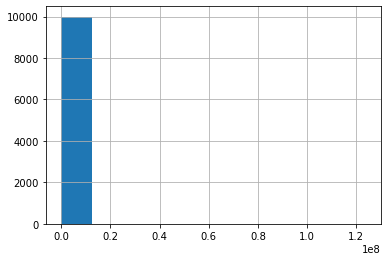

In [47]:
df1.Price_euro.hist()

<function matplotlib.pyplot.show(close=None, block=None)>

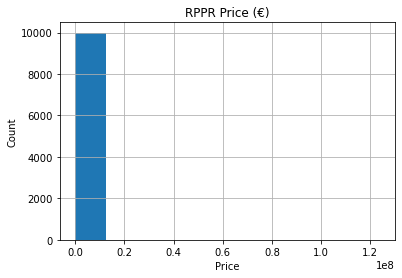

In [48]:
plt.title("RPPR Price (€)")
plt.xlabel('Price')
plt.ylabel('Count')

plt.hist(df1.Price_euro)
plt.grid()
plt.show

<AxesSubplot:>

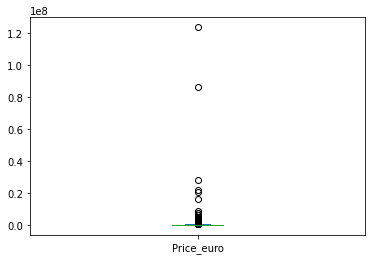

In [49]:
df1.Price_euro.plot(kind='box')

<function matplotlib.pyplot.show(close=None, block=None)>

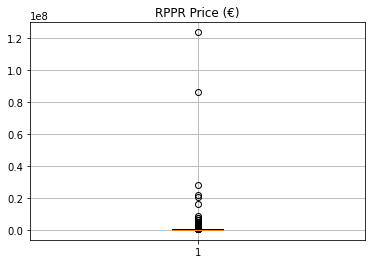

In [65]:
plt.figure(facecolor = 'white')
plt.title("RPPR Price (€)")
#plt.xlabel('Price')
#plt.ylabel('Count')

plt.boxplot(df1.Price_euro)
plt.grid()
plt.savefig('media/rppr_price_boxplot.png')
plt.show

The outliers are skewing our graphs and will be looked into for the data quality plan.

<b>Bar Plots for Categorical Features:</b>

<AxesSubplot:>

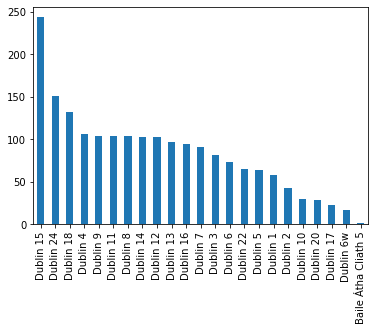

In [50]:
df1['Postal_Code'].value_counts().plot(kind='bar')

Dublin 5 has some that are written in Irish and need to be translated and combined.

<AxesSubplot:>

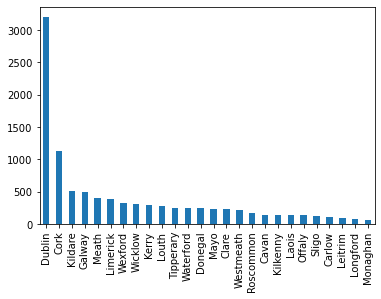

In [51]:
df1['County'].value_counts().plot(kind='bar')

<AxesSubplot:>

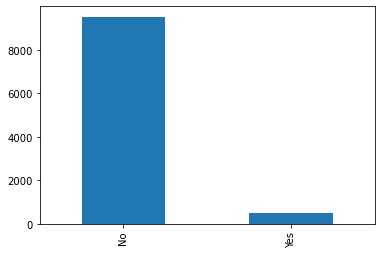

In [52]:
df1['Not_Full_Market_Price'].value_counts().plot(kind='bar')

<AxesSubplot:>

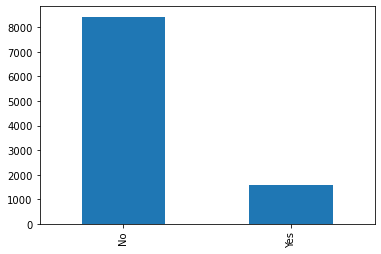

In [53]:
df1['VAT_Exclusive'].value_counts().plot(kind='bar')

<AxesSubplot:>

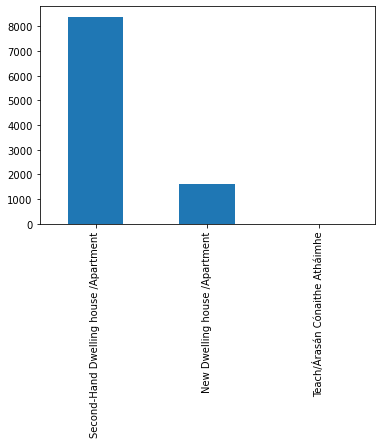

In [54]:
df1['Description_of_Property'].value_counts().plot(kind='bar')

Second-Hand has some that are written in Irish and need to be translated and combined.

<AxesSubplot:>

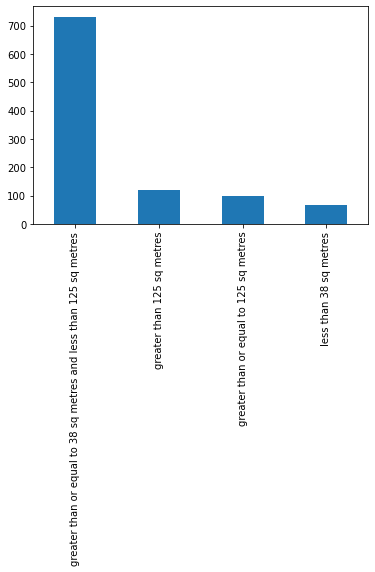

In [55]:
df1['Property_Size_Description'].value_counts().plot(kind='bar')

The two greater than 125 buckets need to be combined.

<AxesSubplot:>

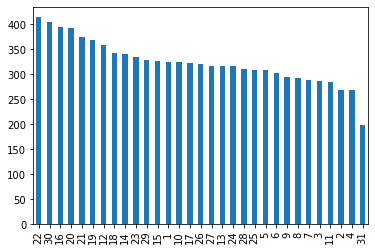

In [56]:
df1['Day'].value_counts().plot(kind='bar')

<AxesSubplot:>

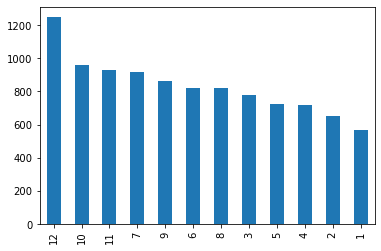

In [57]:
df1['Month'].value_counts().plot(kind='bar')

<AxesSubplot:>

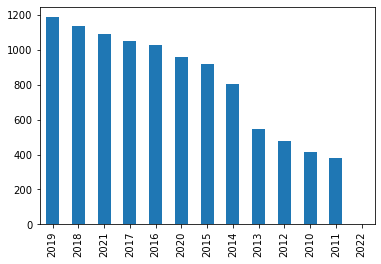

In [58]:
df1['Year'].value_counts().plot(kind='bar')

## Data Cleaning

### Summary of Data Cleaning Plan:

| Features                           | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| Postal_Code                        | Missing Values                | Do Nothing                     |
| Postal_Code                        | Mis-labeled                   | Translate & Update             |
| Postal_Code                        | Null Values                   | Do Nothing                     |
| Price_euro                         | Upper Bound Outliers          | Remove 11 Highest(Multi-Unit)  |
| Price_euro                         | Lower Bound Outliers          | Do Nothing                     |
| Description_of_Property            | Mis-labeled                   | Translate & Update             |
| Property_Size_Description          | Mis-labeled                   | Update & Combine               |
| Property_Size_Description          | Null Values                   | Do Nothing                     |

### Data Cleaning continued in 'data_cleaning.ipynb'